In [1]:
!pip install torchvision

  Using cached torchvision-0.13.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torch-1.12.1-cp39-cp39-win_amd64.whl (161.8 MB)


In [2]:
import torchvision

In [8]:
!pip3 install opencv-python

In [9]:
import cv2

# Проверка и подбор размера

In [10]:
img = cv2.imread('data/Default/Cup/20220918_163943.jpg')

cv2.imshow('Test', img)
cv2.waitKey(0)

-1

In [11]:
small = cv2.resize(img, (0,0), fx=0.1, fy=0.1)
cv2.imshow('Small', small)
cv2.waitKey(0)

-1

In [12]:
small.shape

(259, 461, 3)

In [13]:
small_small = cv2.resize(img, (228, 128))
cv2.imshow('Train', small_small)
cv2.waitKey(0)

-1

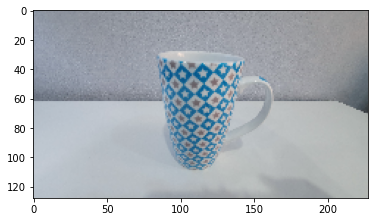

In [14]:
import matplotlib.pyplot as plt

plt.imshow(small_small)
plt.show()

## Обрежем пустые области по 50 пикселей слева и справа

In [15]:
crop_img = small_small[:, 51:179]
cv2.imshow('Cropped', crop_img)
cv2.waitKey(0)

-1

In [16]:
crop_img.shape #получили изображение с тремя каналами 128 на 128

(128, 128, 3)

# Применяем предобработку ко всей выборке и сохраняем

In [17]:
import os

path_before = 'data/Default/Cup/'
path_after = 'data/Cropped/Cup/'
for filename in os.listdir(path_before):
    img = cv2.imread(path_before+filename)
    small_img = cv2.resize(img, (228, 128))
    crop_img = small_img[:, 51:179]
    cv2.imwrite(path_after + filename, crop_img)
    
path_before = 'data/Default/Pen/'
path_after = 'data/Cropped/Pen/'
for filename in os.listdir(path_before):
    img = cv2.imread(path_before+filename)
    small_img = cv2.resize(img, (228, 128))
    crop_img = small_img[:, 51:179]
    cv2.imwrite(path_after + filename, crop_img)

In [18]:
crop_img = cv2.imread('data/Cropped/Cup/20220918_163943.jpg')
cv2.imshow('Test', crop_img)
cv2.waitKey(0)

-1

# Аугументация изображений

In [19]:
import numpy as np
import cv2
import random

class Data_augmentation:
    def __init__(self, path, image_name):
        '''
        Импорт изображения
        :param path: путь к изображения
        :param image_name: название изображения
        '''
        self.path = path
        self.name = image_name
        print(path+image_name)
        self.image = cv2.imread(path+image_name)

    def rotate(self, image, angle=90, scale=1.0):
        '''
        Rotate the image
        :param image: изображение в работе
        :param angle: угол поворота в градусах.
        :param scale: изотропный масштабный коэффициент.
        '''
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def flip(self, image, vflip=False, hflip=False):
        '''
        Flip the image
        :param image: изображение в работе
        :param vflip: Поворачивать по вертикали
        :param hflip: по горизонтали
        '''
        if hflip or vflip:
            if hflip and vflip:
                c = -1
            else:
                c = 0 if vflip else 1
            image = cv2.flip(image, flipCode=c)
        return image
    
    def add_GaussianNoise(self, image, mean=0, var=0.001):

       
        image = np.array(image/255, dtype=float)
        noise = np.random.normal(mean, var ** 0.5, image.shape)
        out = image + noise
        if out.min() < 0:
            low_clip = -1.
        else:
            low_clip = 0.
        out = np.clip(out, low_clip, 1.0)
        out = np.uint8(out*255)

        return out 
    
    
    def image_augment(self, save_path): 
        '''
        Create the new image with imge augmentation
        :param path: the path to store the new image
        ''' 
        img = self.image.copy()
        img_flip = self.flip(img, vflip=True, hflip=False)
        img_rot = self.rotate(img)
        img_gaussian = self.add_GaussianNoise(img)
        
        name_int = self.name[:len(self.name)-4]
        cv2.imwrite(save_path+'%s' %str(name_int)+'_vflip.jpg', img_flip)
        cv2.imwrite(save_path+'%s' %str(name_int)+'_rot.jpg', img_rot)
        cv2.imwrite(save_path+'%s' %str(name_int)+'_GaussianNoise.jpg', img_gaussian)
    
    
def Aug(file_dir, output_path):
    for root, _, files in os.walk(file_dir):
        print(root)
    for file in files:
        raw_image = Data_augmentation(root,file)
        raw_image.image_augment(output_path)

In [127]:
file_dir = 'data/Cropped/Cup/'
output_path = 'data/Aug/Cup/'
Aug(file_dir, output_path)

data/Cropped/Cup/
data/Cropped/Cup/20220918_163943.jpg
data/Cropped/Cup/20220918_163945.jpg
data/Cropped/Cup/20220918_163947.jpg
data/Cropped/Cup/20220918_163950.jpg
data/Cropped/Cup/20220918_164018.jpg
data/Cropped/Cup/20220918_164020.jpg
data/Cropped/Cup/20220918_164023.jpg
data/Cropped/Cup/20220918_164031.jpg
data/Cropped/Cup/20220918_164034.jpg
data/Cropped/Cup/20220918_164037.jpg
data/Cropped/Cup/20220918_164126.jpg
data/Cropped/Cup/20220918_164128.jpg
data/Cropped/Cup/20220918_164130.jpg
data/Cropped/Cup/20220918_164132.jpg
data/Cropped/Cup/20220918_164135.jpg
data/Cropped/Cup/20220918_164138.jpg
data/Cropped/Cup/20220918_164140.jpg
data/Cropped/Cup/20220918_164144.jpg
data/Cropped/Cup/20220918_164147.jpg
data/Cropped/Cup/20220918_164150.jpg
data/Cropped/Cup/20220918_164158.jpg
data/Cropped/Cup/20220918_164201.jpg
data/Cropped/Cup/20220918_164205.jpg
data/Cropped/Cup/20220918_164209.jpg
data/Cropped/Cup/20220918_164212.jpg
data/Cropped/Cup/20220918_164221.jpg
data/Cropped/Cup/202

In [128]:
file_dir = 'data/Cropped/Pen/'
output_path = 'data/Aug/Pen/'
Aug(file_dir, output_path)

data/Cropped/Pen/
data/Cropped/Pen/20220918_165116.jpg
data/Cropped/Pen/20220918_165119.jpg
data/Cropped/Pen/20220918_165124.jpg
data/Cropped/Pen/20220918_165127.jpg
data/Cropped/Pen/20220918_165129.jpg
data/Cropped/Pen/20220918_165131.jpg
data/Cropped/Pen/20220918_165134.jpg
data/Cropped/Pen/20220918_165136.jpg
data/Cropped/Pen/20220918_165138.jpg
data/Cropped/Pen/20220918_165140.jpg
data/Cropped/Pen/20220918_165144.jpg
data/Cropped/Pen/20220918_165147.jpg
data/Cropped/Pen/20220918_165149.jpg
data/Cropped/Pen/20220918_165151.jpg
data/Cropped/Pen/20220918_165153.jpg
data/Cropped/Pen/20220918_165156.jpg
data/Cropped/Pen/20220918_165159.jpg
data/Cropped/Pen/20220918_165201.jpg
data/Cropped/Pen/20220918_165203.jpg
data/Cropped/Pen/20220918_165206.jpg
data/Cropped/Pen/20220918_165211.jpg
data/Cropped/Pen/20220918_165213.jpg
data/Cropped/Pen/20220918_165215.jpg
data/Cropped/Pen/20220918_165217.jpg
data/Cropped/Pen/20220918_165219.jpg
data/Cropped/Pen/20220918_165222.jpg
data/Cropped/Pen/202

## Теперь нужно разделить выборку на train test

### (Сделал вручную) создал dir datasets, в ней train, test, в папках деление на директории Cup, Pen

## Загружаем выборку

In [22]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.onnx
import torchvision
%matplotlib inline
plt.ion()   # interactive moden

In [129]:
dir = os.path.abspath(os.curdir)
data_dir=os.path.join(dir, "data/datasets/")

## Уменьшаем изображение до 32 на 32 и нормализуем

In [130]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

## Создаём датасет и проверяем

In [143]:
def get_dataset(data_dir, data_transforms ):
    # create train and test datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                              data_transforms[x])
                      for x in ['train', 'test']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,
                                                 shuffle=True, num_workers=4)
                  for x in ['train', 'test']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
    #get classes from train dataset folders name
    classes = image_datasets['train'].classes

    return dataloaders["train"], dataloaders['test'], classes, dataset_sizes

In [144]:
trainloader, testloader, classes, dataset_sizes=get_dataset(data_dir,data_transforms)
print('Classes: ',  classes)
print('The datasest have: ',  dataset_sizes ," images")

Classes:  ['Cup', 'Pen']
The datasest have:  {'train': 210, 'test': 90}  images


In [145]:
len(trainloader)

210

In [146]:
len(testloader)

90

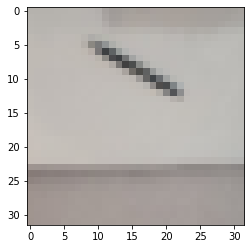

  Pen


In [149]:
def imshow(img):
    img = img / 2+0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
#images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [150]:
print(trainloader)

In [151]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [152]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
device = torch.device("cpu")
for epoch in range(50):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 15 == 14:    # print every 15 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 15))
            running_loss = 0.0
print('Finished Training')

[1,    15] loss: 0.697
[1,    30] loss: 0.675
[1,    45] loss: 0.687
[1,    60] loss: 0.618
[1,    75] loss: 0.598
[1,    90] loss: 0.482
[1,   105] loss: 0.670
[1,   120] loss: 0.296
[1,   135] loss: 0.249
[1,   150] loss: 0.686
[1,   165] loss: 0.441
[1,   180] loss: 0.273
[1,   195] loss: 0.428
[1,   210] loss: 0.376
[2,    15] loss: 0.246
[2,    30] loss: 0.283
[2,    45] loss: 0.288
[2,    60] loss: 0.302
[2,    75] loss: 0.375
[2,    90] loss: 0.195
[2,   105] loss: 0.304
[2,   120] loss: 0.164
[2,   135] loss: 0.188
[2,   150] loss: 0.498
[2,   165] loss: 0.329
[2,   180] loss: 0.580
[2,   195] loss: 0.370
[2,   210] loss: 0.335
[3,    15] loss: 0.281
[3,    30] loss: 0.566
[3,    45] loss: 0.211
[3,    60] loss: 0.388
[3,    75] loss: 0.264
[3,    90] loss: 0.289
[3,   105] loss: 0.238
[3,   120] loss: 0.221
[3,   135] loss: 0.291
[3,   150] loss: 0.162
[3,   165] loss: 0.434
[3,   180] loss: 0.358
[3,   195] loss: 0.384
[3,   210] loss: 0.327
[4,    15] loss: 0.138
[4,    30] 

[26,    15] loss: 0.424
[26,    30] loss: 0.073
[26,    45] loss: 0.202
[26,    60] loss: 0.075
[26,    75] loss: 0.282
[26,    90] loss: 0.393
[26,   105] loss: 0.083
[26,   120] loss: 0.056
[26,   135] loss: 0.147
[26,   150] loss: 0.033
[26,   165] loss: 0.188
[26,   180] loss: 0.095
[26,   195] loss: 0.192
[26,   210] loss: 0.204
[27,    15] loss: 0.298
[27,    30] loss: 0.174
[27,    45] loss: 0.254
[27,    60] loss: 0.206
[27,    75] loss: 0.150
[27,    90] loss: 0.290
[27,   105] loss: 0.364
[27,   120] loss: 0.186
[27,   135] loss: 0.170
[27,   150] loss: 0.087
[27,   165] loss: 0.097
[27,   180] loss: 0.492
[27,   195] loss: 0.171
[27,   210] loss: 0.079
[28,    15] loss: 0.162
[28,    30] loss: 0.170
[28,    45] loss: 0.290
[28,    60] loss: 1.542
[28,    75] loss: 0.376
[28,    90] loss: 0.126
[28,   105] loss: 0.166
[28,   120] loss: 0.086
[28,   135] loss: 0.087
[28,   150] loss: 0.088
[28,   165] loss: 0.331
[28,   180] loss: 0.318
[28,   195] loss: 0.322
[28,   210] loss

[50,   150] loss: 0.126
[50,   165] loss: 0.052
[50,   180] loss: 0.103
[50,   195] loss: 0.811
[50,   210] loss: 0.200
Finished Training


Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 5.0680, -4.0268])


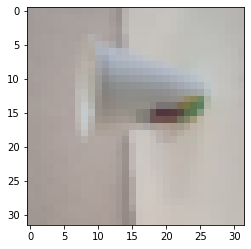

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-2.0741,  1.9759])


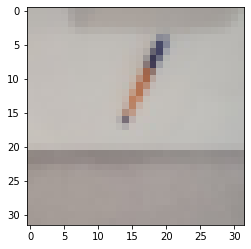

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 44.4824, -36.1144])


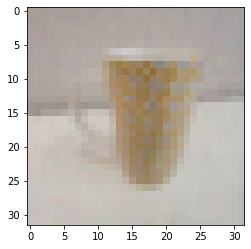

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-9.4046,  8.4243])


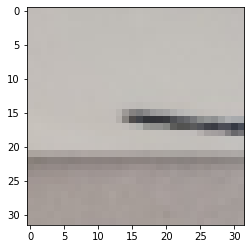

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-3.6910,  3.4401])


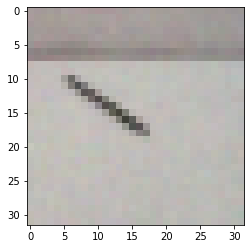

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


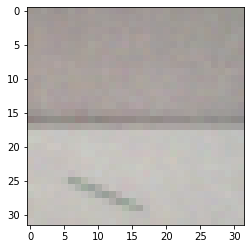

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 38.5311, -31.2501])


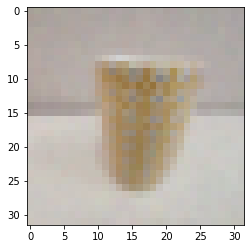

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-7.4688,  6.6996])


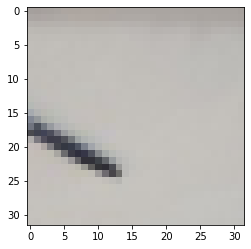

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-2.0994,  1.9658])


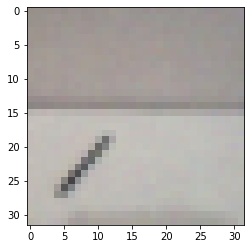

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.9856,  1.0156])


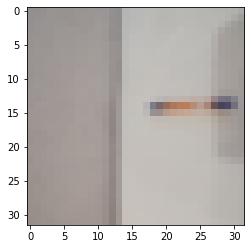

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6473,  0.7106])


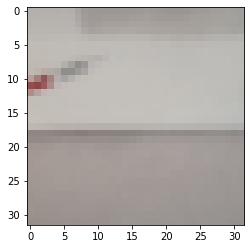

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 208.3533, -169.3360])


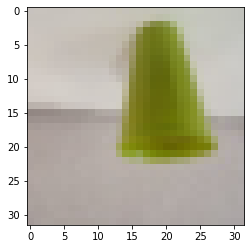

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 41.5255, -33.3935])


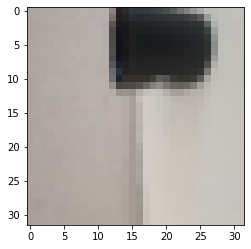

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


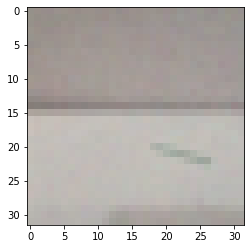

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 58.7503, -47.6262])


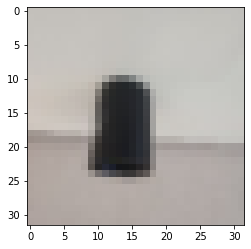

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([-0.1204,  0.2397])


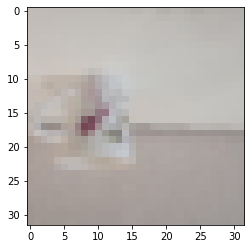

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 55.4538, -44.8687])


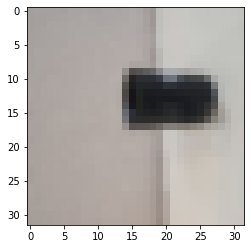

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


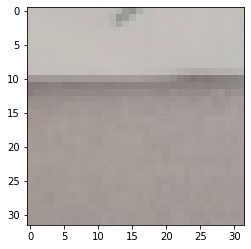

Predict class - Cup, real class - Pen, probability (Cup,Pen) - tensor([0.3806, 0.1026])


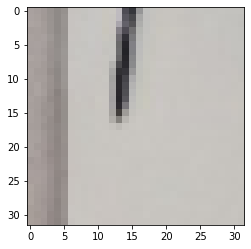

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 35.9485, -28.7215])


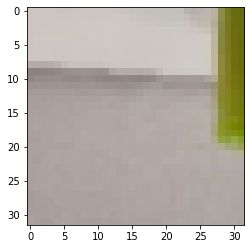

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 125.6733, -102.2822])


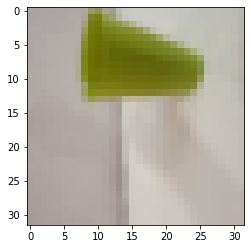

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 90.9522, -73.6209])


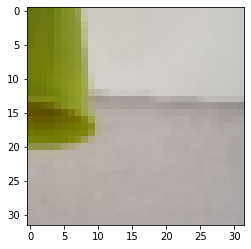

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([11.9079, -9.6137])


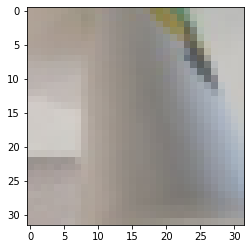

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 58.0472, -47.1838])


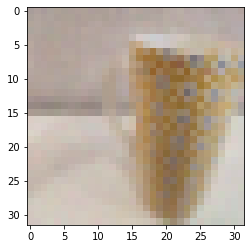

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.9972,  0.9945])


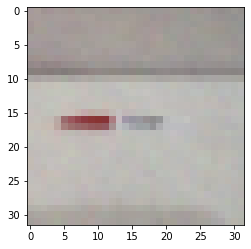

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 46.5174, -37.5693])


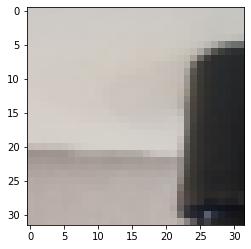

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 21.2281, -17.2337])


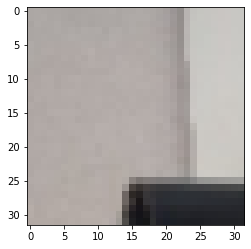

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 63.1185, -51.2222])


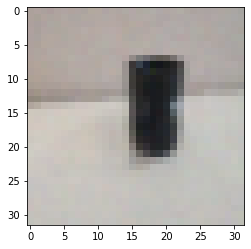

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-7.8109,  6.9912])


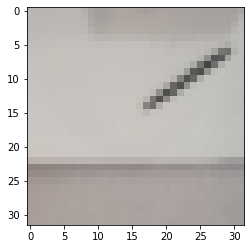

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 67.8946, -55.4127])


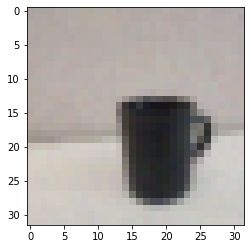

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 42.3913, -34.2047])


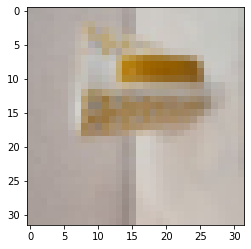

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 0.6589, -0.4232])


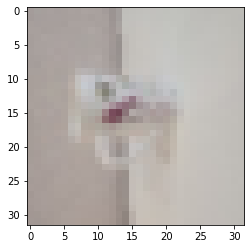

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


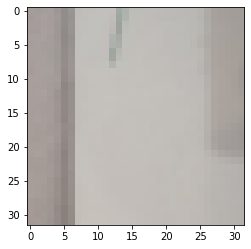

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-2.5858,  2.4007])


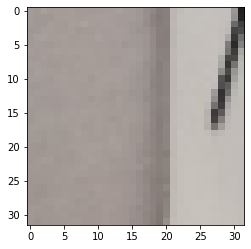

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-1.3135,  1.2867])


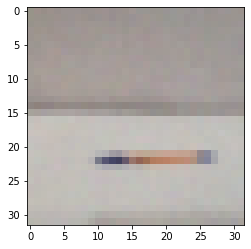

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 32.0638, -25.9346])


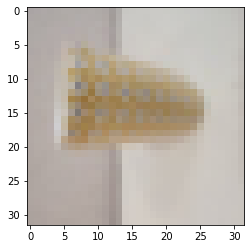

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-3.4358,  3.1565])


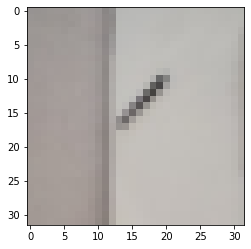

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


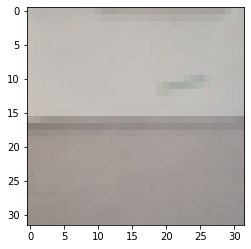

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


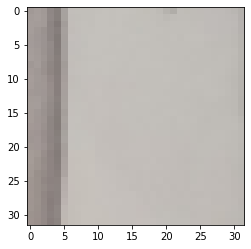

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-3.4337,  3.2661])


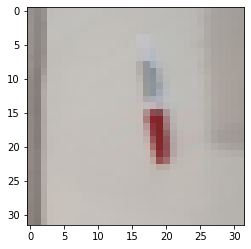

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 3.7656, -2.9410])


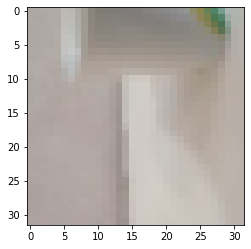

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


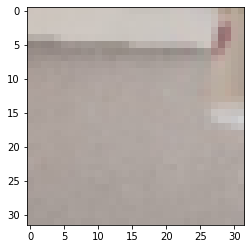

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-3.1579,  2.9712])


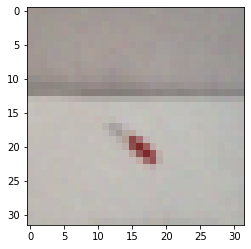

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 36.7565, -30.0020])


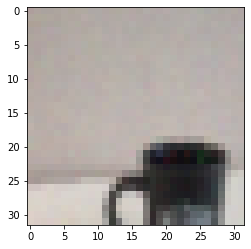

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-5.5856,  5.0664])


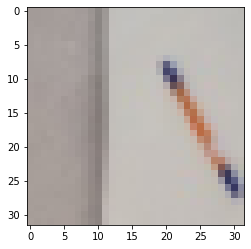

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([-0.1199,  0.2421])


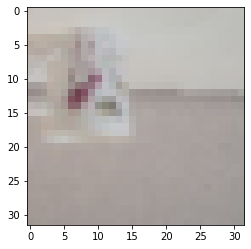

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-1.4254,  1.4004])


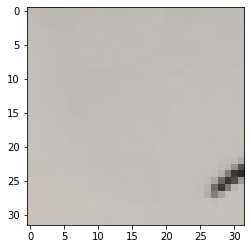

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-2.8923,  2.6833])


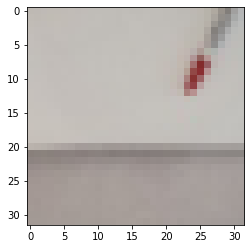

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 17.8908, -14.5764])


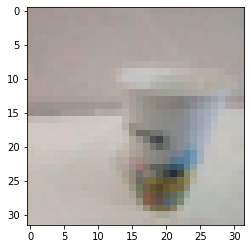

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-6.6447,  5.9437])


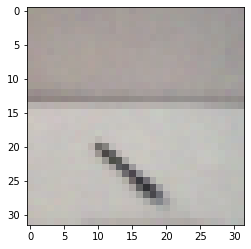

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-1.3255,  1.3076])


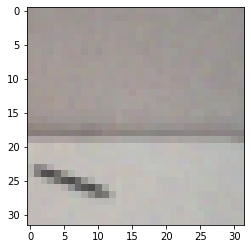

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([113.4716, -91.4677])


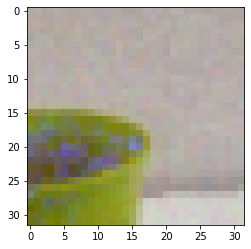

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-2.2660,  2.1573])


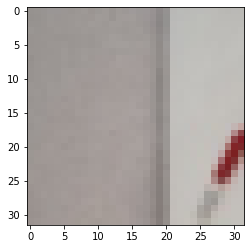

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-3.8976,  3.6181])


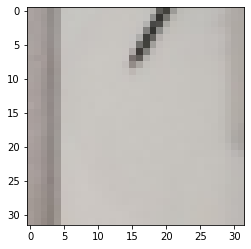

Predict class - Cup, real class - Pen, probability (Cup,Pen) - tensor([0.1482, 0.1119])


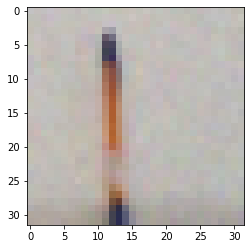

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 54.9601, -44.4787])


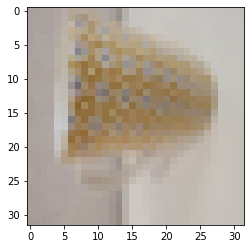

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6905,  0.7510])


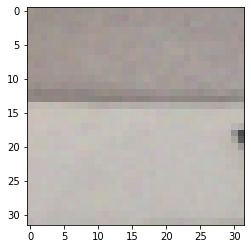

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-1.4161,  1.3989])


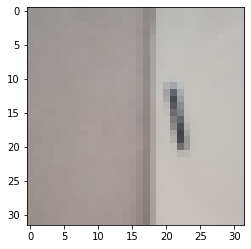

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-4.2651,  3.8625])


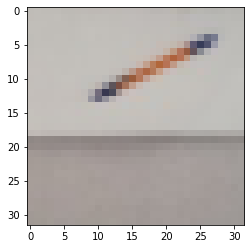

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


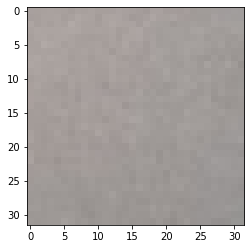

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([-0.0404,  0.1842])


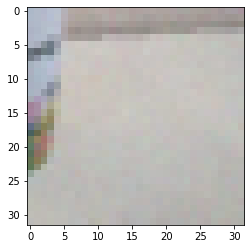

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


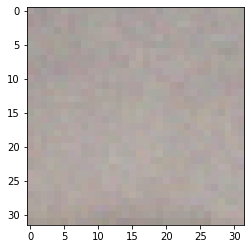

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 70.1216, -57.0397])


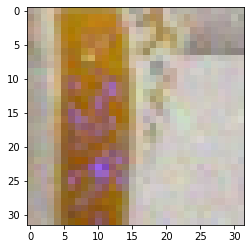

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 233.3792, -189.0405])


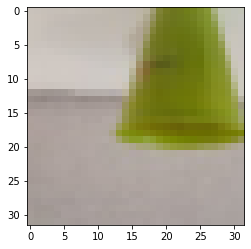

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-1.9641,  1.8959])


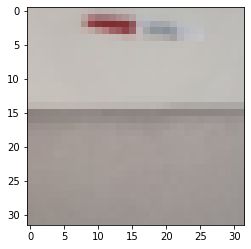

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 90.1961, -73.3143])


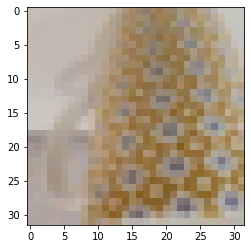

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 1.5603, -1.1539])


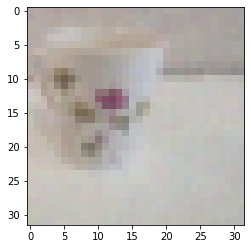

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-2.4489,  2.3141])


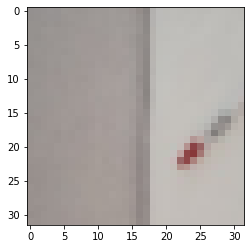

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-2.4780,  2.3443])


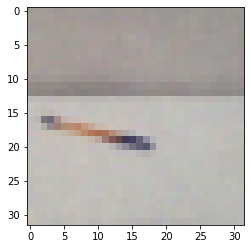

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6814,  0.7527])


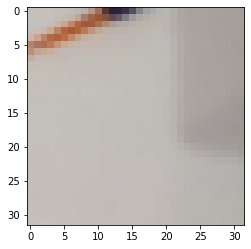

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-10.6439,   9.6050])


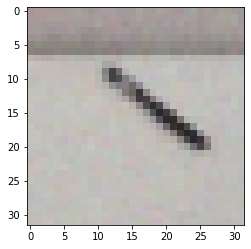

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.3499,  0.4448])


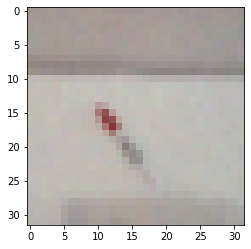

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-1.4327,  1.4115])


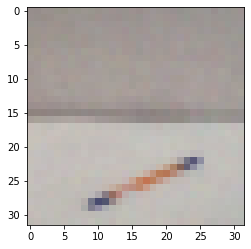

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 3.0311, -2.3478])


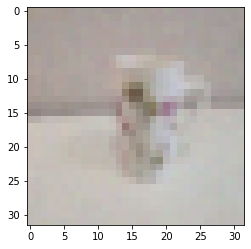

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 3.6583, -2.8571])


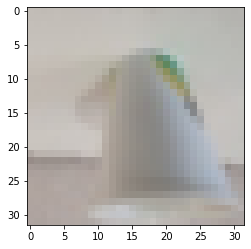

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


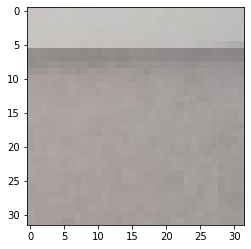

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


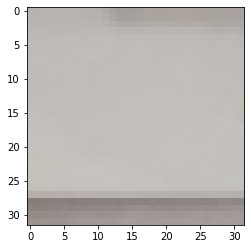

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6485,  0.7114])


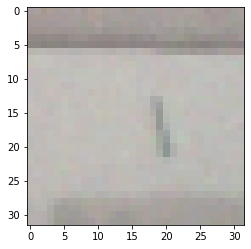

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 54.0507, -43.5286])


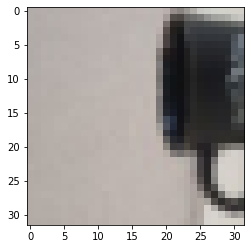

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 29.4074, -23.7549])


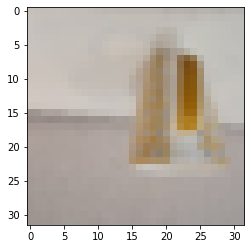

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 4.0039, -3.1248])


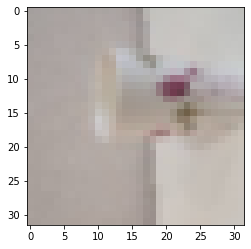

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([-0.8291,  0.8483])


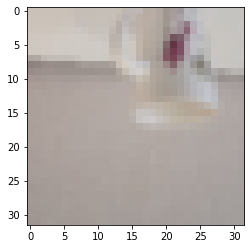

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-0.6426,  0.7060])


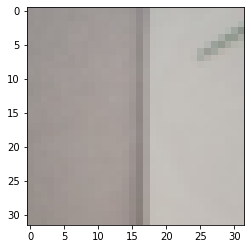

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 28.0276, -22.5805])


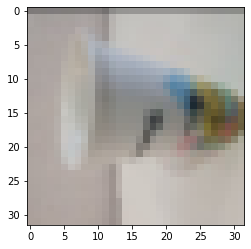

Predict class - Pen, real class - Pen, probability (Cup,Pen) - tensor([-6.3186,  5.6717])


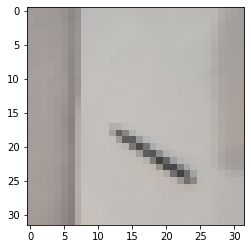

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([-0.6227,  0.6873])


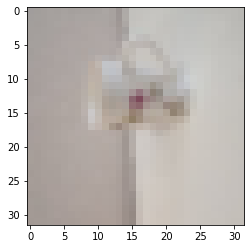

Predict class - Pen, real class - Cup, probability (Cup,Pen) - tensor([0.0681, 0.0881])


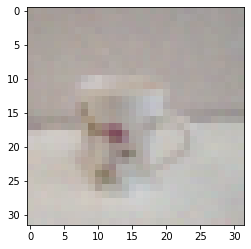

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 148.8544, -120.6339])


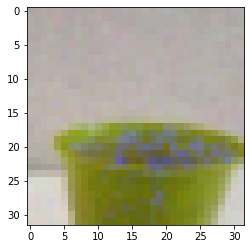

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 50.0664, -40.0904])


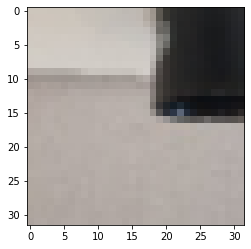

Predict class - Cup, real class - Cup, probability (Cup,Pen) - tensor([ 172.8156, -140.4909])


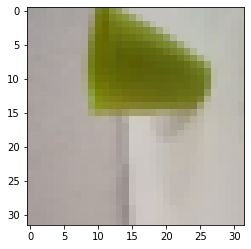

Accuracy of the network on the 90 test images: 88 %


In [153]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        for printdata in list(zip(predicted,labels,outputs)):
            printclass =[classes[int(printdata[0])],classes[int(printdata[1])]]
            print('Predict class - {0}, real class - {1}, probability ({2},{3}) - {4}'.format( printclass[0],printclass[1],
                                                                              classes[0], classes [1],printdata[2]))

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        imshow(torchvision.utils.make_grid(images))
        #print('GroundTruth: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
print('Accuracy of the network on the', dataset_sizes['test'], 'test images: %d %%' % (
    100 * correct / total))